In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/My Drive/Janice/cyberbullying_tweets_train.csv")
test = pd.read_csv("/content/drive/My Drive/Janice/cyberbullying_tweets_test.csv")


In [ ]:
train_data = train.TWEET_TEXT.values
train_labels = train.RESULT.values
test_data = test.TWEET_TEXT.values

In [ ]:
%%time
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/5'
embed = hub.KerasLayer(module_url, trainable=True, name='USE_embedding')

CPU times: user 27.4 s, sys: 4.73 s, total: 32.2 s
Wall time: 34.2 s


In [ ]:
def build_model(embed):
    
    model = Sequential([
        Input(shape=[], dtype=tf.string),
        embed,
        Dense(1, activation='sigmoid')
    ])
    model.compile(Adam(2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
model = build_model(embed)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE_embedding (KerasLayer)  (None, 512)               147354880 
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 147,355,393
Trainable params: 147,355,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True)

train_history = model.fit(
    train_data, train_labels,
    validation_split=0.25,
    epochs=4,
    callbacks=[checkpoint],
    batch_size=32
)

Epoch 1/4


1501/1501 [==============================] - 751s 452ms/step - loss: 0.3210 - accuracy: 0.9035 - val_loss: 0.2653 - val_accuracy: 0.9350
Epoch 2/4
1501/1501 [==============================] - 695s 463ms/step - loss: 0.2114 - accuracy: 0.9472 - val_loss: 0.2402 - val_accuracy: 0.9306
Epoch 3/4
1501/1501 [==============================] - 667s 444ms/step - loss: 0.1527 - accuracy: 0.9645 - val_loss: 0.2132 - val_accuracy: 0.9364
Epoch 4/4
1501/1501 [==============================] - 651s 433ms/step - loss: 0.1096 - accuracy: 0.9767 - val_loss: 0.2283 - val_accuracy: 0.9271


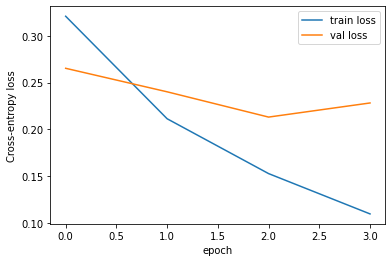

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], label='train loss')
plt.plot(train_history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

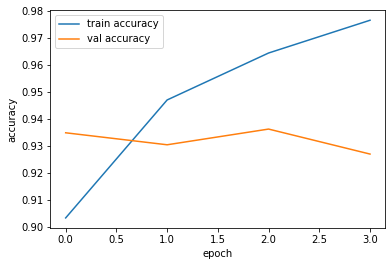

In [ ]:
plt.plot(train_history.history['accuracy'], label='train accuracy')
plt.plot(train_history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();